In [15]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

import csv

mu_depth, sigma_depth = 3, 1.5
mu_delta, sigma_delta = 0.0001, 0.1

fixingfactor = 0.2
delta = []
depth = []
output = []
flag = []
noise = [4,34,37,98,25,87,123,345,233,888,567,454,222,455,653,324,54]
for k in range(1000):
    flag.append(0)
# temp2 = []
depth.append(np.random.normal(mu_depth, sigma_depth, 1000))
# depth.append(temp2)

for i in range(1000):    
    delta.append(np.random.normal(mu_delta, sigma_delta, 1000))
    temp = []
    temp2 = []
    count = 0
     # fixing factor
        
    for j in range(1000):
        if flag[j] > 0:
            flag[j] -= 1
        if flag[j] <  0:
            depth[i][j] = 4
            flag[j] = 0
        if depth[i][j] - i*delta[i][j] >= 0:
            temp.append(depth[i][j] - i*delta[i][j])
        else:
            temp.append(0)
        if depth[i][j] - i*delta[i][j] < 0.5 or j in noise:
            temp2.append(1)
            flag[j] = np.random.randint(5,10) 
            count += 1
        else:
            temp2.append(0)
    
        
    depth.append(temp)
    output.append(temp2)
    
depth2 = []
depth3 = []
for i in range(1,1001):
    depth2.append(np.array(depth[i]))
    depth3.append(depth[i])
    # print(count)

# print("depth:")
# print(delta)

# print("delta:")
# print(delta)

# print(output)

1.14.0


In [16]:
class_names = ['overflow', 'not overflow']

# print(np.asarray(depth2).shape)
# print(np.asarray(delta).shape)
# print(np.asarray(output).shape)

print("\n")
print(len(depth2))
print(len(delta))



1000
1000


In [17]:
mina = np.amin(depth2)
maxa = np.amax(depth2)
# print(np.array(depth2))
depth_norm = []

for x in depth2:
    x = (x-mina)/(maxa-mina)
    depth_norm.append(x)

mina = np.amin(delta)
maxa = np.amax(delta)

delta_norm = []

for x in delta:
    x = (x-mina)/(maxa-mina)
    delta_norm.append(x)
    
delt_train_size = int(len(delta_norm) * .8)
print("train: ",delt_train_size)
print("test: ",len(delta_norm)-delt_train_size)

dept_train_size = int(len(depth_norm) * .8)
print("train: ",dept_train_size)
print("test: ",len(depth_norm)-dept_train_size)



train:  800
test:  200
train:  800
test:  200


In [18]:
dept_train = depth_norm[:dept_train_size]
depttrain = []
delt_train = delta_norm[:delt_train_size]
delttrain = []
dept_test = depth_norm[dept_train_size:]
depttest = []
delt_test = delta_norm[delt_train_size:]
delttest = []
labels_train =  output[:dept_train_size]
labelstrain = []
labels_test = output[dept_train_size:]
labelstest = []

for i in range(1000):
    for x in dept_train:
        depttrain.append([x[i]])
    
    for x in delt_train:
        delttrain.append([x[i]])


    for x in dept_test:
        depttest.append([x[i]])
    

    for x in delt_test:
        delttest.append([x[i]])


    for x in labels_train:
        labelstrain.append(x[i])
    

    for x in labels_test:
        labelstest.append([x[i]])

In [20]:
layers = keras.layers
output2 = []

depth_inputs = layers.Input(shape=(1,))
delta_inputs = layers.Input(shape=(1,))
merged_layer = layers.concatenate([depth_inputs, delta_inputs], axis=-1)
merged_layer = layers.Dense(256, activation='relu')(merged_layer)

predictions = layers.Dense(1)(merged_layer)
deep_model = keras.Model(inputs=[depth_inputs, delta_inputs], outputs=predictions)


In [21]:

deep_model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

print(deep_model.summary())

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 2)            0           input_7[0][0]                    
                                                                 input_8[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 256)          768         concatenate_3[0][0]        

In [26]:
# print(np.array(delta))
# print(type(delta))
# print(type(depth2))
# print(type(output))

# print(np.asarray(delttrain).shape)
accuracies = []

for i in range(200):
    deep_model.fit([np.asarray(delttrain[i*1000:(i+1)*1000]), np.asarray(depttrain[i*1000:(i+1)*1000])], np.asarray(labelstrain[i*1000:(i+1)*1000]), epochs=2)
    test_loss, test_acc = deep_model.evaluate([np.asarray(delttest[i*1000:(i+1)*1000]), np.asarray(depttest[i*1000:(i+1)*1000])], np.asarray(labelstest[i*1000:(i+1)*1000]))
    accuracies.append(test_acc)
# print(predictions.summary())
# deep_model.fit([dept_train], np.asarray(labels_train), epochs=10)

Epoch 1/2
1000/1000 [==============================] - 0s 58us/sample - loss: 0.0263 - acc: 0.9570
Epoch 2/2
1000/1000 [==============================] - 0s 25us/sample - loss: 0.2074 - acc: 0.7840
Epoch 1/2
1000/1000 [==============================] - 0s 46us/sample - loss: 0.0258 - acc: 0.9570
Epoch 2/2
1000/1000 [==============================] - 0s 22us/sample - loss: 0.0116 - acc: 0.9830
Epoch 1/2
1000/1000 [==============================] - 0s 41us/sample - loss: 0.0228 - acc: 0.9610
Epoch 2/2
1000/1000 [==============================] - 0s 22us/sample - loss: 0.0107 - acc: 0.9800
Epoch 1/2
1000/1000 [==============================] - 0s 40us/sample - loss: 0.5627 - acc: 0.2360
Epoch 2/2
1000/1000 [==============================] - 0s 22us/sample - loss: 0.6258 - acc: 0.0000e+00
Epoch 1/2
1000/1000 [==============================] - 0s 44us/sample - loss: 0.2693 - acc: 0.5370
Epoch 2/2
1000/1000 [==============================] - 0s 23us/sample - loss: 0.0238 - acc: 0.9760
Epoch 

1000/1000 [==============================] - 0s 19us/sample - loss: 0.0207 - acc: 0.9880
Epoch 1/2
1000/1000 [==============================] - 0s 38us/sample - loss: 0.2579 - acc: 0.6640
Epoch 2/2
1000/1000 [==============================] - 0s 15us/sample - loss: 0.0740 - acc: 0.9550
Epoch 1/2
1000/1000 [==============================] - 0s 45us/sample - loss: 0.2269 - acc: 0.6400
Epoch 2/2
1000/1000 [==============================] - 0s 30us/sample - loss: 0.4913 - acc: 0.5570
Epoch 1/2
1000/1000 [==============================] - 0s 40us/sample - loss: 0.0905 - acc: 0.9210
Epoch 2/2
1000/1000 [==============================] - 0s 18us/sample - loss: 0.0249 - acc: 0.9640
Epoch 1/2
1000/1000 [==============================] - 0s 43us/sample - loss: 0.0406 - acc: 0.9290
Epoch 2/2
1000/1000 [==============================] - 0s 18us/sample - loss: 0.0193 - acc: 0.9700
Epoch 1/2
1000/1000 [==============================] - 0s 39us/sample - loss: 0.0302 - acc: 0.9460
Epoch 2/2
1000/1000 

1000/1000 [==============================] - 0s 23us/sample - loss: 0.0159 - acc: 0.9710
Epoch 1/2
1000/1000 [==============================] - 0s 41us/sample - loss: 0.0518 - acc: 0.9130
Epoch 2/2
1000/1000 [==============================] - 0s 22us/sample - loss: 0.0171 - acc: 0.9790
Epoch 1/2
1000/1000 [==============================] - 0s 39us/sample - loss: 0.0355 - acc: 0.9420
Epoch 2/2
1000/1000 [==============================] - 0s 15us/sample - loss: 0.0058 - acc: 0.9910
Epoch 1/2
1000/1000 [==============================] - 0s 35us/sample - loss: 0.0315 - acc: 0.9580
Epoch 2/2
1000/1000 [==============================] - 0s 28us/sample - loss: 0.0015 - acc: 0.9990
Epoch 1/2
1000/1000 [==============================] - 0s 43us/sample - loss: 0.0401 - acc: 0.9380
Epoch 2/2
1000/1000 [==============================] - 0s 18us/sample - loss: 0.0145 - acc: 0.9740
Epoch 1/2
1000/1000 [==============================] - 0s 38us/sample - loss: 0.0106 - acc: 0.9840
Epoch 2/2
1000/1000 

1000/1000 [==============================] - 0s 42us/sample - loss: 0.0359 - acc: 0.9410
Epoch 2/2
1000/1000 [==============================] - 0s 19us/sample - loss: 0.0100 - acc: 0.9880
Epoch 1/2
1000/1000 [==============================] - 0s 33us/sample - loss: 0.0242 - acc: 0.9700
Epoch 2/2
1000/1000 [==============================] - 0s 23us/sample - loss: 0.0030 - acc: 0.9960
Epoch 1/2
1000/1000 [==============================] - 0s 43us/sample - loss: 0.0317 - acc: 0.9470
Epoch 2/2
1000/1000 [==============================] - 0s 23us/sample - loss: 0.0104 - acc: 0.9810
Epoch 1/2
1000/1000 [==============================] - 0s 44us/sample - loss: 0.0230 - acc: 0.9620
Epoch 2/2
1000/1000 [==============================] - 0s 19us/sample - loss: 7.3474e-04 - acc: 1.0000
Epoch 1/2
1000/1000 [==============================] - 0s 40us/sample - loss: 0.0205 - acc: 0.9670
Epoch 2/2
1000/1000 [==============================] - 0s 17us/sample - loss: 0.0147 - acc: 0.9770
Epoch 1/2
1000/1

1000/1000 [==============================] - 0s 27us/sample - loss: 0.1961 - acc: 0.7770
Epoch 1/2
1000/1000 [==============================] - 0s 37us/sample - loss: 0.0459 - acc: 0.9400
Epoch 2/2
1000/1000 [==============================] - 0s 23us/sample - loss: 0.0070 - acc: 0.9920
Epoch 1/2
1000/1000 [==============================] - 0s 37us/sample - loss: 0.0102 - acc: 0.9880
Epoch 2/2
1000/1000 [==============================] - 0s 25us/sample - loss: 0.0105 - acc: 0.9910
Epoch 1/2
1000/1000 [==============================] - 0s 38us/sample - loss: 0.0380 - acc: 0.9350
Epoch 2/2
1000/1000 [==============================] - 0s 24us/sample - loss: 0.0069 - acc: 0.9870
Epoch 1/2
1000/1000 [==============================] - 0s 39us/sample - loss: 0.0166 - acc: 0.9740
Epoch 2/2
1000/1000 [==============================] - 0s 24us/sample - loss: 0.0213 - acc: 0.9620
Epoch 1/2
1000/1000 [==============================] - 0s 37us/sample - loss: 0.0079 - acc: 0.9890
Epoch 2/2
1000/1000 

1000/1000 [==============================] - 0s 18us/sample - loss: 0.0059 - acc: 0.9870
Epoch 1/2
1000/1000 [==============================] - 0s 42us/sample - loss: 0.0242 - acc: 0.9680
Epoch 2/2
1000/1000 [==============================] - 0s 22us/sample - loss: 0.0028 - acc: 0.9960
Epoch 1/2
1000/1000 [==============================] - 0s 36us/sample - loss: 0.0188 - acc: 0.9750
Epoch 2/2
1000/1000 [==============================] - 0s 22us/sample - loss: 2.8141e-04 - acc: 1.0000
Epoch 1/2
1000/1000 [==============================] - 0s 39us/sample - loss: 0.0171 - acc: 0.9770
Epoch 2/2
1000/1000 [==============================] - 0s 25us/sample - loss: 0.0308 - acc: 0.9360
Epoch 1/2
1000/1000 [==============================] - 0s 36us/sample - loss: 0.0121 - acc: 0.9790
Epoch 2/2
1000/1000 [==============================] - 0s 24us/sample - loss: 0.0122 - acc: 0.9770
Epoch 1/2
1000/1000 [==============================] - 0s 36us/sample - loss: 0.0195 - acc: 0.9720
Epoch 2/2
1000/1

1000/1000 [==============================] - 0s 43us/sample - loss: 0.0167 - acc: 0.9750
Epoch 2/2
1000/1000 [==============================] - 0s 24us/sample - loss: 0.0034 - acc: 0.9980
Epoch 1/2
1000/1000 [==============================] - 0s 40us/sample - loss: 0.0130 - acc: 0.9810
Epoch 2/2
1000/1000 [==============================] - 0s 20us/sample - loss: 0.0059 - acc: 0.9920
Epoch 1/2
1000/1000 [==============================] - 0s 37us/sample - loss: 0.0311 - acc: 0.9540
Epoch 2/2
1000/1000 [==============================] - 0s 19us/sample - loss: 0.0050 - acc: 0.9930
Epoch 1/2
1000/1000 [==============================] - 0s 37us/sample - loss: 0.0165 - acc: 0.9800
Epoch 2/2
1000/1000 [==============================] - 0s 16us/sample - loss: 0.0045 - acc: 0.9980
Epoch 1/2
1000/1000 [==============================] - 0s 38us/sample - loss: 0.0218 - acc: 0.9790
Epoch 2/2
1000/1000 [==============================] - 0s 25us/sample - loss: 0.0057 - acc: 0.9980
Epoch 1/2
1000/1000 

1000/1000 [==============================] - 0s 19us/sample - loss: 0.0034 - acc: 0.9950
Epoch 1/2
1000/1000 [==============================] - 0s 36us/sample - loss: 0.0245 - acc: 0.9640
Epoch 2/2
1000/1000 [==============================] - 0s 23us/sample - loss: 0.0158 - acc: 0.9940


0.92735


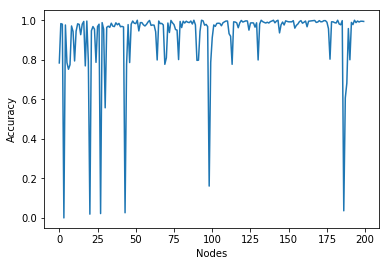

In [29]:

print(np.mean(accuracies))
plt.plot(range(0,200),accuracies)
plt.xlabel("Nodes")
plt.ylabel("Accuracy")
plt.show()